In [1]:
import torch

In [2]:
#create and run a local rag from scratch

In [3]:
import os
import requests


pdf_path = "human-nutrition-text.pdf"

if not os.path.exists(pdf_path):
    print(f"file doesn't exists,downloading")

    url="https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    filename=pdf_path

    response=requests.get(url)

    if response.status_code == 200:
        with open(filename,"wb") as file:
            file.write(response.content)

        print(f"[info] the file has been downloaded and saves as  {filename}")
    else:
        print(f"[info] the download has failed")
else:
    print("file path already exists")

file doesn't exists,downloading
[info] the file has been downloaded and saves as  human-nutrition-text.pdf


In [4]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 73.6 MB/s eta 0:00:00


In [5]:
!pip install tqdm

In [6]:
import fitz
from tqdm.auto import tqdm


def text_formatter(text:str):
    cleaned_text=text.replace("\n"," ").strip()
    return cleaned_text

def open_and_read_pdf(pdf_path:str) -> list[dict]:
    doc=fitz.open(pdf_path)
    pages_and_texts=[]
    for page_number,page in tqdm(enumerate(doc)):
        text=page.get_text()
        text=text_formatter(text=text)
        pages_and_texts.append({"page number":page_number-41,
                               "page_char_count":len(text),
                               "page_word_count":len(text.split(" ")),
                               "page_sentence_count_raw":len(text.split(". ")),
                               "page_token_count":len(text)/4,
                               "text":text})
    return pages_and_texts
pages_and_texts=open_and_read_pdf(pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [7]:
len(pages_and_texts)

1208

In [8]:
import random
random.sample(pages_and_texts,k=3)

[{'page number': 605,
  'page_char_count': 102,
  'page_word_count': 13,
  'page_sentence_count_raw': 1,
  'page_token_count': 25.5,
  'text': 'view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=354  Phytochemicals  |  605'},
 {'page number': 470,
  'page_char_count': 832,
  'page_word_count': 139,
  'page_sentence_count_raw': 5,
  'page_token_count': 208.0,
  'text': 'Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities.\xa0 These activities are  available in the web-based textbook and not available in the  downloadable versions (EPUB, Digital PDF, Print_PDF, or  Open Document).  Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommended that users complete these activities using a  desktop or laptop computer and in Google Chrome.  \xa0 An interactive or media element has been  excl

In [9]:
import pandas as pd
df=pd.DataFrame(pages_and_texts)
df

,page number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...
...,...,...,...,...,...,...
1203,1162,1676,252,18,419.00,39. Exercise 10.2 & 11.3 reused “Egg Oval Food...
1204,1163,1617,254,10,404.25,Images / Pixabay License; “Pumpkin Cartoon Ora...
1205,1164,1715,261,13,428.75,Flashcard Images Note: Most images in the fla...
1206,1165,1733,268,13,433.25,ShareAlike 11. Organs reused “Pancreas Organ ...


In [10]:
df.describe().round(2)

,page number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00
std,348.86,560.38,95.76,6.19,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,4.00,190.50
50%,562.50,1231.50,214.50,10.00,307.88
75%,864.25,1603.50,271.00,14.00,400.88
max,1166.00,2308.00,429.00,32.00,577.00


In [11]:
df['page_token_count'].sum()

346697.25

In [12]:
pip install spacy

In [13]:
from spacy.lang.en import English

nlp=English()

nlp.add_pipe("sentencizer")

doc=nlp("this is a sentence. this is another sentence. i like elephants")

assert len(list(doc.sents))==3

list(doc.sents)

[this is a sentence., this is another sentence., i like elephants]

In [14]:
for item in tqdm(pages_and_texts):
    item["sentences"]=list(nlp(item["text"]).sents)

    item["sentences"] =[str(sentence) for sentence in item["sentences"]]

    item["page_sentences_count_spacy"]=len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [15]:
random.sample(pages_and_texts,k=1)

[{'page number': 693,
  'page_char_count': 1099,
  'page_word_count': 181,
  'page_sentence_count_raw': 16,
  'page_token_count': 274.75,
  'text': 'Intakes: The Essential Guide to Nutrient Requirements. The  National Academies of Sciences Engineering Medicine. 356.  Dietary Sources of Molybdenum:  The food sources of molybdenum varies depending on the  content in the soil in the specific region. Legumes, grain products,  and nuts are rich sources of dietary molybdenum. Animal products,  fruits, and most vegetables are low in molybdenum.1  Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities.\xa0 These activities are  available in the web-based textbook and not available in the  downloadable versions (EPUB, Digital PDF, Print_PDF, or  Open Document).  Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommend

In [16]:
df=pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentences_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


In [17]:
num_sentence_chunk_size=10

def split_list(input_list:list,slice_size:int=num_sentence_chunk_size)->list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0,len(input_list),slice_size)]

test_list=list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [18]:
for item in tqdm(pages_and_texts):
    item["sentence_chunks"]=split_list(input_list=item['sentences'],
                                       slice_size=num_sentence_chunk_size)
    item["num_chunks"]=len(item['sentence_chunks'])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [19]:
random.sample(pages_and_texts,k=1)

[{'page number': 104,
  'page_char_count': 1178,
  'page_word_count': 203,
  'page_sentence_count_raw': 7,
  'page_token_count': 294.5,
  'text': 'cells, pick up oxygen to be transported to tissues throughout the  body. The pulmonary artery carries deoxygenated blood to the  lungs. The pulmonary artery branches multiple times as it follows  the bronchi, and each branch becomes progressively smaller in  diameter down to the tiny capillaries where the alveoli release  carbon dioxide from blood into the lungs to be exhaled and take up  oxygen from inhaled air to oxygenate the blood. Once the blood is  oxygenated, it drains from the alveoli by way of multiple pulmonary  veins that exit the lungs to carry oxygen to the rest of the body.  Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities.\xa0 These activities are  available in the web-based textbook and not available in the  down

In [20]:
df=pd.DataFrame(pages_and_texts)

In [21]:
df.describe().round(2)

,page number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentences_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,1.53
std,348.86,560.38,95.76,6.19,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,1.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


In [22]:
import re

pages_and_chunks=[]
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict={}
        chunk_dict["page_number"]=item["page number"]

        joined_sentence_chunk="".join(sentence_chunk).replace("  "," ").strip()
        joined_sentence_chunk=re.sub(r'\.([A-Z])',r'. \1',joined_sentence_chunk)

        chunk_dict["sentence_chunk"]=joined_sentence_chunk

        chunk_dict["chunk_char_count"]=len(joined_sentence_chunk)
        chunk_dict['chunk_word_count']=len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict['chunk_token_count']=len(joined_sentence_chunk)/4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [23]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 1083,
  'sentence_chunk': 'Office of the Surgeon General (US). National Call To Action To Promote Oral Health. National Institute of Dental and Craniofacial Research (US).2003; 03-5303. https://www.ncbi.nlm.nih.gov/books/NBK47472/. Accessed April 15, 2018. Nutrition, Health and Disease | 1083',
  'chunk_char_count': 266,
  'chunk_word_count': 34,
  'chunk_token_count': 66.5}]

In [24]:
df=pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


In [25]:
#min_token_length=30
#for row in df[df['chunk_token_count']<=min_token_length].sample(5).iterrows():
#    print(f'chunk token count:{row[1]['chunk_token_count']}| Text:{row[1]["sentence_chunk"]}')

In [26]:
min_token_length=30
pages_and_chunks_over_min_token_len=df[df['chunk_token_count']>min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [27]:
random.sample(pages_and_chunks_over_min_token_len,k=1)

[{'page_number': 657,
  'sentence_chunk': 'Vegans are at higher risk for iron deficiency, but careful meal planning does prevent its development. Iron deficiency is the most common of all micronutrient deficiencies. Table 11.1 Enhancers and Inhibitors of Iron Absorption Enhancer Inhibitor Meat Phosphate Fish Calcium Poultry Tea Seafood Coffee Stomach acid Colas Soy protein High doses of minerals (antacids) Bran/fiber Phytates Oxalates Polyphenols Figure 11.3 Iron Absorption, Functions, and Loss http://www.cdc.gov/nutrition/everyone/basics/ vitamins/iron.html. Iron | 657',
  'chunk_char_count': 533,
  'chunk_word_count': 70,
  'chunk_token_count': 133.25}]

In [28]:
df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25
...,...,...,...,...,...
1838,1164,Flashcard Images Note: Most images in the flas...,1305,176,326.25
1839,1164,Hazard Analysis Critical Control Points reused...,375,51,93.75
1840,1165,ShareAlike 11. Organs reused “Pancreas Organ A...,1286,173,321.50
1841,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,59,102.50


In [31]:
from sentence_transformers import SentenceTransformer
embedding_model=SentenceTransformer(model_name_or_path='all-mpnet-base-v2',device='cpu')

sentences=["sentence transformer library provides easy way to create embeddings.","sentences can be embedded.","i like horses."]

embeddings=embedding_model.encode(sentences)
embedding_dict=dict(zip(sentences,embeddings))
for sentence,embeddings in embedding_dict.items():
    print(f"Sentence:{sentence}")
    print(f"embedding:{embeddings}")
    print("")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence:sentence transformer library provides easy way to create embeddings.
embedding:[-3.09291799e-02  3.00378520e-02 -1.58880092e-02  5.16356640e-02
 -2.24950332e-02 -4.50603757e-03  1.96337905e-02 -6.41060993e-02
  1.12980064e-02 -1.90796237e-02  4.09653038e-02  5.78230545e-02
 -3.97321545e-02  1.75129063e-02  4.00363803e-02 -5.22889942e-02
  4.89347875e-02 -8.66102346e-04 -1.24843949e-02  5.45227574e-03
  4.26544435e-02  3.32281590e-02  2.27266569e-02  2.89838742e-02
 -1.01222740e-02 -3.03084496e-02  5.27356239e-03 -4.44679447e-02
  6.50130436e-02 -1.69188958e-02 -3.56466249e-02 -5.77580463e-03
  5.31558059e-02  1.47097483e-02  9.59802037e-07  1.07098883e-02
 -3.84037793e-02 -2.31867284e-03  1.58786178e-02  1.49646821e-02
  5.57223298e-02 -5.27521335e-02  1.84469819e-02  5.05199395e-02
 -3.29367444e-02 -1.21444035e-02  4.25028056e-02  1.82263963e-02
  7.80586749e-02  4.15912122e-02 -1.84311308e-02 -3.82322185e-02
  1.24061538e-03 -2.12389585e-02 -1.52045712e-02  2.75161229e-02
 -

In [30]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 14.5 MB/s eta 0:00:00


In [32]:
embedding_model.to("cuda")
for item in tqdm(pages_and_chunks_over_min_token_len):
    item['embedding']=embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1680 [00:00<?, ?it/s]

In [33]:
text_chunks=[item['sentence_chunk'] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture to their fascinating food creations. Add

In [34]:
text_chunk_embeddings=embedding_model.encode(text_chunks,batch_size=32,convert_to_tensor=True)
text_chunk_embeddings

tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

In [35]:
text_chunks_and_embeddings_df=pd.DataFrame(pages_and_chunks_over_min_token_len)
embedding_df_save_path="text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embedding_df_save_path,index=False)

In [36]:
text_chunks_and_embeddings_df_load=pd.read_csv(embedding_df_save_path)
text_chunks_and_embeddings_df_load.head(5)


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242675e-02 9.02281404e-02 -5.09548886e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156419e-02 5.92139773e-02 -1.66167244e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801842e-02 3.39813754e-02 -2.06426680e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566911e-02 3.81275006e-02 -8.46854132e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264494e-02 -8.49763490e-03 9.57159605e-...


In [37]:
import random
import torch
import numpy as np
import pandas as pd
device="cuda" if torch.cuda.is_available() else 'cpu'

text_chunks_and_embeddings_df=pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embeddings_df['embedding']=text_chunks_and_embeddings_df['embedding'].apply(lambda x:np.fromstring(x.strip("[]"),sep=" "))

embeddings=torch.tensor(np.stack(text_chunks_and_embeddings_df['embedding'].tolist(),axis=0),dtype=torch.float32).to(device)
pages_and_chunks=text_chunks_and_embeddings_df.to_dict(orient='records')


In [38]:
text_chunks_and_embeddings_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242675, 0.0902281404, -0.00509548886, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156419, 0.0592139773, -0.0166167244, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801842, 0.0339813754, -0.020642668, 0.0..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566911, 0.0381275006, -0.00846854132, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264494, -0.0084976349, 0.00957159605, -..."
...,...,...,...,...,...,...
1675,1164,Flashcard Images Note: Most images in the flas...,1305,176,326.25,"[0.0185622536, -0.0164277665, -0.0127045633, -..."
1676,1164,Hazard Analysis Critical Control Points reused...,375,51,93.75,"[0.0334720612, -0.0570440851, 0.0151489386, -0..."
1677,1165,ShareAlike 11. Organs reused “Pancreas Organ A...,1286,173,321.50,"[0.0770515501, 0.00978557579, -0.0121817412, 0..."
1678,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,410,59,102.50,"[0.103045158, -0.0164701864, 0.00826846063, 0...."


In [39]:
text_chunks_and_embeddings_df['embedding']

,embedding
0,"[0.0674242675, 0.0902281404, -0.00509548886, -..."
1,"[0.0552156419, 0.0592139773, -0.0166167244, -0..."
2,"[0.0279801842, 0.0339813754, -0.020642668, 0.0..."
3,"[0.0682566911, 0.0381275006, -0.00846854132, -..."
4,"[0.0330264494, -0.0084976349, 0.00957159605, -..."
...,...
1675,"[0.0185622536, -0.0164277665, -0.0127045633, -..."
1676,"[0.0334720612, -0.0570440851, 0.0151489386, -0..."
1677,"[0.0770515501, 0.00978557579, -0.0121817412, 0..."
1678,"[0.103045158, -0.0164701864, 0.00826846063, 0...."


In [40]:
#embeddings=np.stack(text_chunks_and_embeddings_df['embedding'].tolist(),axis=0)
#embeddings

In [41]:
embeddings.shape

torch.Size([1680, 768])

In [42]:
from sentence_transformers import util,SentenceTransformer

embedding_model=SentenceTransformer(model_name_or_path='all-mpnet-base-v2',device=device)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [43]:
embeddings=embeddings.to(device)

In [44]:
embeddings.is_cuda

True

In [45]:
query='macronutrients functions'
print(f"query:{query}")
query_embedding=embedding_model.encode(query,convert_to_tensor=True)

from time import perf_counter as timer
start_time=timer()
dot_scores=util.dot_score(a=query_embedding,b=embeddings)[0]
end_time=timer()
print(f"[info] time taken to get scores on {len(embeddings)} embeddings is {end_time-start_time:.5f} seconds")

top_results_dot_product=torch.topk(dot_scores,k=5)
top_results_dot_product

query:macronutrients functions
[info] time taken to get scores on 1680 embeddings is 0.02443 seconds


torch.return_types.topk(
values=tensor([0.6926, 0.6738, 0.6646, 0.6536, 0.6473], device='cuda:0'),
indices=tensor([42, 47, 41, 51, 46], device='cuda:0'))

In [46]:
embeddings[42]

tensor([ 5.1221e-02, -4.2620e-02,  1.9736e-02,  1.3061e-02,  5.7660e-02,
         1.5082e-02, -8.9882e-02,  3.1013e-02, -2.9885e-02, -3.4716e-02,
         3.2101e-02,  1.0706e-02,  2.0689e-02,  3.2325e-02,  3.6295e-02,
        -3.5382e-02,  6.1487e-02, -4.2065e-02, -3.9543e-02,  3.1618e-02,
         5.2496e-04,  5.4385e-03,  3.7327e-02, -9.4486e-03, -1.0709e-01,
         5.0533e-02,  2.9634e-02,  1.1539e-02, -2.4629e-03, -5.1220e-02,
        -8.9395e-03, -1.5075e-03, -4.0798e-02, -3.0363e-02,  2.0901e-06,
        -4.2852e-02, -3.4321e-02,  6.9492e-03, -7.1784e-02,  1.2295e-02,
        -4.4625e-03, -5.2279e-02,  2.0028e-02, -1.3444e-02,  4.9811e-02,
         3.5815e-02,  4.8072e-02, -3.2667e-02, -3.7631e-02, -7.6327e-03,
         6.8840e-03, -5.6015e-03,  2.2582e-02, -1.7459e-02,  3.0660e-02,
         4.6848e-02,  1.8691e-02,  7.5970e-02, -1.0662e-02,  4.5786e-02,
         2.9025e-02,  1.9985e-02,  9.4373e-03, -1.2996e-02,  5.3157e-02,
         6.1592e-02, -5.0408e-02, -2.5444e-02, -3.5

In [47]:
pages_and_chunks[42]

{'page_number': 5,
 'sentence_chunk': 'Macronutrients Nutrients that are needed in large amounts are called macronutrients. There are three classes of macronutrients: carbohydrates, lipids, and proteins. These can be metabolically processed into cellular energy. The energy from macronutrients comes from their chemical bonds. This chemical energy is converted into cellular energy that is then utilized to perform work, allowing our bodies to conduct their basic functions. A unit of measurement of food energy is the calorie. On nutrition food labels the amount given for “calories” is actually equivalent to each calorie multiplied by one thousand. A kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a macronutrient in the sense that you require a large amount of it, but unlike the other macronutrients, it does not yield calories. Carbohydrates Carbohydrates are molecules composed of car

In [48]:
import textwrap
def print_wrapped(text,wrap_length=80):
    wrapped_text=textwrap.fill(text,wrap_length)
    print(wrapped_text)

In [49]:
query='macronutrients functions'
print(f"query:'{query}'\n")
print('results:')
for score,idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
    print(f"score:{score:.4f}")
    print("text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"page number:{pages_and_chunks[idx]['page_number']}")


query:'macronutrients functions'

results:
score:0.6926
text:
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are mo

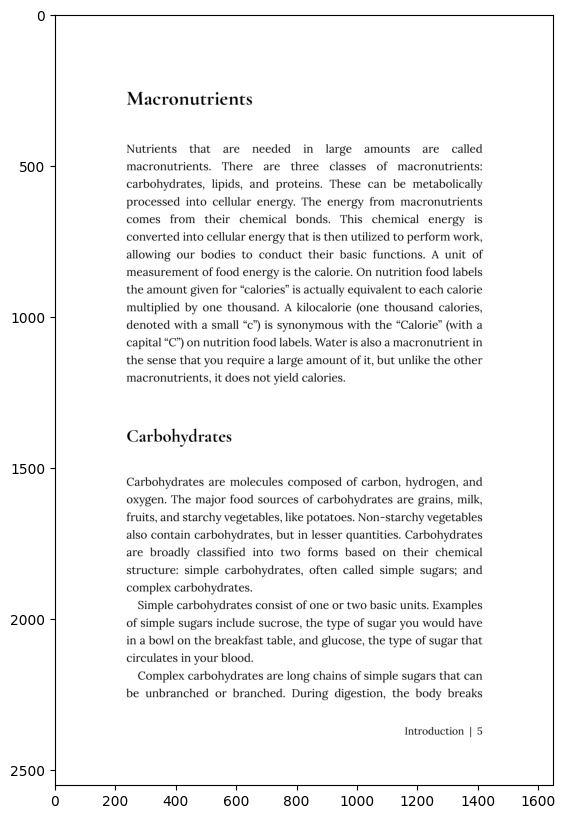

In [50]:
import fitz

pdf_path="human-nutrition-text.pdf"
doc=fitz.open(pdf_path)
page=doc.load_page(5+41)

img=page.get_pixmap(dpi=300)

#img.save("output_filename.png")
doc.close()

img_array=np.frombuffer(img.samples_mv,dtype=np.uint8).reshape((img.h,img.w,img.n))

img_array

import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)

In [51]:
def retrieve_relevant_resources(query:str,embeddings:torch.tensor,model:SentenceTransformer=embedding_model,n_resources_to_return:int=5,
                               print_time:bool=True):
    query_embedding=model.encode(query,convert_to_tensor=True)
    start_time=timer()
    dot_scores=util.dot_score(query_embedding,embeddings)[0]
    end_time=timer()

    if print_time:
        print(f"time taken is {end_time-start_time:.5f} seconds")

    scores,indices=torch.topk(input=dot_scores,k=n_resources_to_return)
    return scores,indices

def print_top_results_and_scores(query:str,
                                 embeddings:torch.tensor,
                                 n_resources_to_return:int=5,
                                 pages_and_chunks:list[dict]=pages_and_chunks):
    scores,indices=retrieve_relevant_resources(query=query,embeddings=embeddings,n_resources_to_return=n_resources_to_return)
    for score,idx in zip(scores,indices):
        print(f"score:{score:.4f}")
        print("text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"page number:{pages_and_chunks[idx]['page_number']}")


In [52]:
retrieve_relevant_resources(query="foods high in fiber",embeddings=embeddings)

time taken is 0.00008 seconds


(tensor([0.6964, 0.6810, 0.5566, 0.5344, 0.5187], device='cuda:0'),
 tensor([ 418,  360,  358, 1047,  412], device='cuda:0'))

In [53]:
query='food high in fiber'
#retrieve_relevant_resources(query=query,embeddings=embeddings)
print_top_results_and_scores(query=query,embeddings=embeddings)

time taken is 0.00007 seconds
score:0.7015
text:
• Change it up a bit and experience the taste and satisfaction of other whole
grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as
almonds, pistachios, raisins, and air-popped popcorn. Add an artichoke and green
peas to your dinner plate more 276 | Carbohydrates and Personal Diet Choices
page number:276
score:0.6864
text:
Dietary fiber is categorized as either water-soluble or insoluble. Some examples
of soluble fibers are inulin, pectin, and guar gum and they are found in peas,
beans, oats, barley, and rye. Cellulose and lignin are insoluble fibers and a
few dietary sources of them are whole-grain foods, flax, cauliflower, and
avocados. Cellulose is the most abundant fiber in plants, making up the cell
walls and providing structure. Soluble fibers are more easily accessible to
bacterial enzymes in the large intestine so they can be broken down to a greater
extent than insoluble fibers, but even some breakdown o

In [54]:
device

'cuda'

In [55]:
import torch
gpu_memory_bytes=torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb=round(gpu_memory_bytes/(2**30))
print(f"available gpu memory in gbs is :{gpu_memory_gb}")

available gpu memory in gbs is :15


In [56]:
!nvidia-smi

Wed Oct 16 06:13:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              34W /  70W |   1567MiB / 15360MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [57]:
!pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [58]:
!huggingface-cli --help

usage: huggingface-cli <command> [<args>]

positional arguments:
  {download,upload,repo-files,env,login,whoami,logout,repo,lfs-enable-largefiles,lfs-multipart-upload,scan-cache,delete-cache,tag,version,upload-large-folder}
                        huggingface-cli command helpers
    download            Download files from the Hub
    upload              Upload a file or a folder to a repo on the Hub
    repo-files          Manage files in a repo on the Hub
    env                 Print information about the environment.
    login               Log in using a token from huggingface.co/settings/tokens
    whoami              Find out which huggingface.co account you are logged in as.
    logout              Log out
    repo                {create} Commands to interact with your huggingface.co repos.
    lfs-enable-largefiles
                        Configure your repository to enable upload of files > 5GB.
    scan-cache          Scan cache directory.
    delete-cache        Delete revis

In [59]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [61]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [62]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 6.6 MB/s eta 0:00:00


In [63]:
import transformers

In [64]:
pip install flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash-attn


In [65]:
torch.cuda.get_device_capability(0)

(7, 5)

In [66]:
import torch
from transformers import AutoTokenizer,AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

from transformers import BitsAndBytesConfig
quantization_config=BitsAndBytesConfig(load_in_4bit=True,
                                       bnb_4bit_compute_dtype=torch.float16)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >=8):
    attn_implementation="flash_attention_2"
else:
    attn_implementation="sdpa"

model_id=model_id

tokenizer=AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

llm_model=AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                              torch_dtype=torch.float16,
                                              quantization_config=quantization_config if use_quantization_config else None,
                                              low_cpu_mem_usage=False,
                                              attn_implementation=attn_implementation).to("cuda")

if not use_quantization_config:
    llm_model.to("cuda")

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [67]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-

In [68]:
def get_model_num_params(model:torch.nn.Module):
  return sum([param.numel() for param in model.parameters()])
get_model_num_params(llm_model)

2506172416

In [69]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    See: https://discuss.pytorch.org/t/gpu-memory-that-model-uses/56822
    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012354048, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [70]:
input_text="what are the macronutrients,and what roles do they play in the human body"

dialogue_template=[
    {"role":"user",
     "content":input_text}
]

prompt=tokenizer.apply_chat_template(conversation=dialogue_template,
                                     tokenize=False,
                                     add_generation_prompt=True)

print(f"\nPrompt (formatted):\n{prompt}")


Prompt (formatted):
<bos><start_of_turn>user
what are the macronutrients,and what roles do they play in the human body<end_of_turn>
<start_of_turn>model



In [71]:
tokenizer

GemmaTokenizerFast(name_or_path='google/gemma-2b-it', vocab_size=256000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<bos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	5: AddedToken("<2mass>", rstrip=False, lstrip=False, single_w

In [74]:
input_ids=tokenizer(prompt,return_tensors='pt').to("cuda")

outputs=llm_model.generate(**input_ids,
                           max_new_tokens=256)
print(f"model outputs is {outputs[0]}")

model outputs is tensor([     2,      2,    106,   1645,    108,   5049,    708,    573, 186809,
        184592, 235269,    639,   1212,  16065,    749,    984,   1554,    575,
           573,   3515,   2971,    107,    108,    106,   2516,    108,  21404,
        235269,   1517, 235303, 235256,    476,  25497,    576,    573, 186809,
        184592,    578,   1024,  16065,    575,    573,   3515,   2971, 235292,
           109,    688,  12298,   1695, 184592,  66058,    109, 235287,   5231,
        156615,  56227,  66058,    108,    141, 235287,  34428,   4134,    604,
           573,   2971, 235303, 235256,   5999,    578,  29703, 235265,    108,
           141, 235287, 110165,  56227,    708,    573,   7920,   4303,    576,
          4134,    604,   1546,   5999, 235265,    108,    141, 235287,  25280,
         72780,    708,   1941,    674,   1987,   5543,    577,  55997, 235269,
          1582,    685,   3733,  29907, 235269,  16803, 235269,    578,  19574,
        235265,    108,

In [76]:
outputs_decoded=tokenizer.decode(outputs[0])
outputs_decoded

"<bos><bos><start_of_turn>user\nwhat are the macronutrients,and what roles do they play in the human body<end_of_turn>\n<start_of_turn>model\nSure, here's a breakdown of the macronutrients and their roles in the human body:\n\n**Macronutrients:**\n\n* **Carbohydrates:**\n    * Provide energy for the body's cells and tissues.\n    * Carbohydrates are the primary source of energy for most cells.\n    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.\n    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.\n\n* **Proteins:**\n    * Build and repair tissues, enzymes, and hormones.\n    * Proteins are essential for immune function, hormone production, and tissue repair.\n    * There are different types of proteins, each with specific functions.\n\n* **Fats:**\n    * Provide energy, insulation, and help absorb vitamins.\n    * Healthy fats include olive oil, avocado, nuts, and seeds.\n    * 

In [77]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions
query_list

['What are the macronutrients, and what roles do they play in the human body?',
 'How do vitamins and minerals differ in their roles and importance for health?',
 'Describe the process of digestion and absorption of nutrients in the human body.',
 'What role does fibre play in digestion? Name five fibre containing foods.',
 'Explain the concept of energy balance and its importance in weight management.',
 'How often should infants be breastfed?',
 'What are symptoms of pellagra?',
 'How does saliva help with digestion?',
 'What is the RDI for protein per day?',
 'water soluble vitamins']

In [78]:
import random
query=random.choice(query_list)
print(f"query:{query}")


scores,indices=retrieve_relevant_resources(query=query,embeddings=embeddings)
scores,indices

query:What are the macronutrients, and what roles do they play in the human body?
time taken is 0.00152 seconds


(tensor([0.7302, 0.7233, 0.6962, 0.6942, 0.6416], device='cuda:0'),
 tensor([42, 47, 46, 41, 52], device='cuda:0'))

In [111]:
def prompt_formatter(query:str,context_items:list[dict]) -> str:
  context=" - " + "\n-".join([item["sentence_chunk"] for item in context_items])
  base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""
  base_prompt = base_prompt.format(context=context, query=query)

  dialogue_template=[
      {"role":"user",
       "content":base_prompt}
  ]
  prompt=tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)

  return prompt
query=random.choice(query_list)
print(f"query:{query}")
scores,indices=retrieve_relevant_resources(query=query,embeddings=embeddings)

context_items=[pages_and_chunks[i] for i in indices]
prompt=prompt_formatter(query=query,context_items=context_items)
print(prompt)

query:What is the RDI for protein per day?
time taken is 0.00006 seconds
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.

Example 2:
Query: What 

In [112]:


input_ids=tokenizer(prompt,return_tensors="pt").to("cuda")

outputs=llm_model.generate(**input_ids,
                           temperature=0.7,
                           do_sample=True,
                           max_new_tokens=256)
output_text=tokenizer.decode(outputs[0])
print(f"query:{query}")
print(f"rag answer:\m{output_text.replace(prompt,'')}")

query:What is the RDI for protein per day?
rag answer:\m<bos>The passage does not explicitly specify the RDI for protein per day, so I cannot answer this question from the context.<eos>


In [115]:
def ask(query:str,
        temperature:float=0.7,
        max_new_tokens:int=256,
        format_answer_text=True,
        return_answer_only=True
        ):
  scores,indices=retrieve_relevant_resources(query=query,embeddings=embeddings)

  context_items=[pages_and_chunks[i] for i in indices]
  for i,item in enumerate(context_items):
    item['score']=scores[i].cpu()


  prompt = prompt_formatter(query=query,
                              context_items=context_items)

  input_ids=tokenizer(prompt,return_tensors="pt").to("cuda")

  outputs=llm_model.generate(**input_ids,
                             temperature=temperature,
                             do_sample=True,
                             max_new_tokens=max_new_tokens)
  output_text=tokenizer.decode(outputs[0])

  if format_answer_text:
    output_text=output_text.replace(prompt,"").replace("<bos>","").replace("<eos>",'')

  if return_answer_only:
    return output_text

  return output_text,context_items


In [117]:
query = random.choice(query_list)
print(f"Query: {query}")

answer, context_items = ask(query=query,
                            temperature=0.2,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print_wrapped(answer)
print(f"Context items:")
context_items

Query: water soluble vitamins
time taken is 0.00008 seconds
Answer:

Sure, here are the relevant passages from the context:  **Passage 1:** >
Vitamins and minerals that make up part of enzymes are referred to as coenzymes
and cofactors, respectively. Coenzymes and cofactors are required by enzymes to
catalyze a specific reaction. They assist in converting a substrate to an end-
product.  **Passage 2:** > Vitamins and minerals that take part in metabolism
and blood function are required for blood renewal and function. Vitamins and
minerals are essential for blood renewal and function. At insufficient levels in
the diet these vitamins and minerals impair the health of blood and consequently
the delivery of nutrients in and wastes out, amongst its many other functions.
**Passage 3:** > Water-soluble vitamins act in the cytosol of cells or in
extracellular fluids such as blood; fat-soluble vitamins are largely responsible
for protecting cell membranes from free radical damage.
Context item

[{'page_number': 592,
  'sentence_chunk': 'recommended that users complete these activities using a desktop or laptop computer and in Google Chrome. \xa0 An interactive or media element has been excluded from this version of the text. You can view it online here: http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=347 \xa0 592 | Water-Soluble Vitamins',
  'chunk_char_count': 305,
  'chunk_word_count': 44,
  'chunk_token_count': 76.25,
  'embedding': array([ 1.31825311e-02, -5.76655753e-02, -5.24329953e-03, -2.93033267e-03,
          4.46129739e-02,  2.92155873e-02,  2.06981711e-02,  2.26659495e-02,
          8.79949108e-02,  2.06947071e-03, -3.64047615e-03,  4.82459664e-02,
         -6.89612643e-04, -2.15124600e-02, -2.46340106e-03, -2.21591089e-02,
         -1.44984135e-02,  2.34625731e-02, -2.20572762e-02,  1.16169238e-02,
         -3.23735672e-04,  8.18866771e-03,  6.48807874e-03, -6.07292401e-03,
          2.90775369e-03,  2.08477192e-02,  2.59447377e-02,  1.03110177e-02,
        